In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW

Downloading...
From: https://drive.google.com/uc?id=10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW
To: /content/Dataset C.zip
162MB [00:01, 119MB/s]


In [ ]:
!unzip '/content/Dataset C.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   

In [ ]:
!rm -rf '/content/PROCESSED_DATASET_170104097'

In [ ]:
data_labels = pd.read_csv('training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [ ]:
TRAIN_PATH = 'Train'
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-c')

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  24298


# **Experiment-1**

In [ ]:
batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200
output_dim   = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

16


In [ ]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:972
Test dataloader:243


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 500. Loss: 2.303298234939575. Accuracy: 10.187281333607737
Epoch:  2
Iteration: 1000. Loss: 2.30427885055542. Accuracy: 10.53714756122659
Iteration: 1500. Loss: 2.310286045074463. Accuracy: 10.146120600946697
Epoch:  3
Iteration: 2000. Loss: 2.3006927967071533. Accuracy: 10.187281333607737
Iteration: 2500. Loss: 2.3002054691314697. Accuracy: 10.53714756122659
Epoch:  4
Iteration: 3000. Loss: 2.2973170280456543. Accuracy: 10.104959868285656
Iteration: 3500. Loss: 2.2969257831573486. Accuracy: 9.816834739658367
Epoch:  5
Iteration: 4000. Loss: 2.3033804893493652. Accuracy: 9.960897303972011
Iteration: 4500. Loss: 2.3043394088745117. Accuracy: 10.619469026548673
Epoch:  6
Iteration: 5000. Loss: 2.299330949783325. Accuracy: 10.104959868285656
Iteration: 5500. Loss: 2.3007028102874756. Accuracy: 12.183576867668245
Epoch:  7
Iteration: 6000. Loss: 2.304348945617676. Accuracy: 11.113397818481168
Iteration: 6500. Loss: 2.3050537109375. Accuracy: 9.816834739658367
Epoch:  8

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/CSE4238/Assignment 2/Models/model_exp1.pkl')

[2.303298234939575, 2.30427885055542, 2.310286045074463, 2.3006927967071533, 2.3002054691314697, 2.2973170280456543, 2.2969257831573486, 2.3033804893493652, 2.3043394088745117, 2.299330949783325, 2.3007028102874756, 2.304348945617676, 2.3050537109375, 2.300940990447998, 2.304727077484131, 2.3021020889282227, 2.2982919216156006, 2.301483631134033, 2.3035762310028076, 2.3006579875946045, 2.302436113357544, 2.3053696155548096, 2.3006303310394287, 2.304126262664795, 2.3030879497528076, 2.3062548637390137, 2.304307699203491, 2.303844928741455, 2.302960157394409, 2.306230306625366, 2.30420184135437]


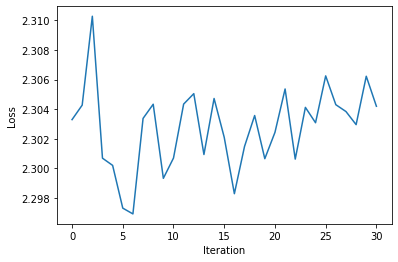

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# **Experiment-2**

### First Approch

In [ ]:
batch_size = 100
num_iters = 36500
input_dim = 28*28
num_hidden = 1000
output_dim = 10

learning_rate = 0.06


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

205


In [ ]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:195
Test dataloader:49


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        self.relu_5 = nn.ReLU()

        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        out  = self.linear_4(out)
        out = self.relu_4(out)

        out  = self.linear_5(out)
        out = self.relu_5(out)

        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=1000, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=1000, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:     
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3010683059692383. Accuracy: 9.693352541675242
Iteration: 1000. Loss: 2.3051323890686035. Accuracy: 9.919736571310969
Iteration: 1500. Loss: 2.304025650024414. Accuracy: 10.26960279892982
Iteration: 2000. Loss: 2.300381898880005. Accuracy: 9.919736571310969
Iteration: 2500. Loss: 2.2793030738830566. Accuracy: 15.888042807161968
Iteration: 3000. Loss: 2.2493178844451904. Accuracy: 9.611031076353159
Iteration: 3500. Loss: 2.2794246673583984. Accuracy: 12.903889689236468
Iteration: 4000. Loss: 2.161395788192749. Accuracy: 17.410989915620497
Iteration: 4500. Loss: 1.9939690828323364. Accuracy: 21.732866845029843
Iteration: 5000. Loss: 2.1420955657958984. Accuracy: 27.845235645194485
Iteration: 5500. Loss: 1.9163672924041748. Accuracy: 22.57666186458119
Iteration: 6000. Loss: 2.232126235961914. Accuracy: 20.4980448651986
Iteration: 6500. Loss: 1.8252439498901367. Accuracy: 25.457913150854086
Iteration: 7000. Loss: 2.2366750240325928. Accuracy: 27.41304795225355
Iterat

KeyboardInterrupt: ignored

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/CSE4238/Assignment 2/Models/model_exp2.pkl')

[2.3010683059692383, 2.3051323890686035, 2.304025650024414, 2.300381898880005, 2.2793030738830566, 2.2493178844451904, 2.2794246673583984, 2.161395788192749, 1.9939690828323364, 2.1420955657958984, 1.9163672924041748, 2.232126235961914, 1.8252439498901367, 2.2366750240325928, 1.8848109245300293, 1.9789631366729736, 1.7203866243362427, 2.018911123275757, 1.8609094619750977, 1.8213648796081543, 1.6325534582138062, 1.6851692199707031, 1.7111338376998901, 1.6830339431762695, 1.6504130363464355, 1.2721974849700928, 1.4654109477996826, 1.5935696363449097, 1.9213413000106812, 1.319307565689087, 1.2585453987121582, 1.2618786096572876, 0.9903803467750549, 1.3130260705947876, 1.158371090888977, 0.9204177856445312, 0.7008200883865356, 0.9258158802986145, 0.9911181330680847, 1.1654857397079468, 0.6415926218032837, 0.5446794629096985, 0.7009220123291016, 0.7690725922584534, 0.6438983082771301, 0.7433390021324158, 0.9718344807624817, 0.5404404997825623, 0.36915257573127747, 0.27974003553390503, 0.51

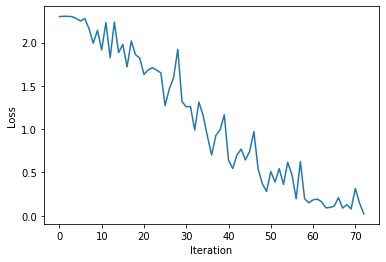

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# **Dataset 2**

In [46]:
!gdown --id 1TLiVh2jKUUQZyhudPoEQmTRscQnLxo9g

Downloading...
From: https://drive.google.com/uc?id=1TLiVh2jKUUQZyhudPoEQmTRscQnLxo9g
To: /content/Dataset_2.zip
69.8MB [00:00, 71.6MB/s]


In [48]:
!unzip '/content/Dataset_2.zip'

Archive:  /content/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [54]:
train_df = pd.read_csv("/content/Dataset_2/verification_train.csv");
train_df.head();

In [55]:
test_df = pd.read_csv('/content/Dataset_2/verification_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


4
784
28
Label: 4


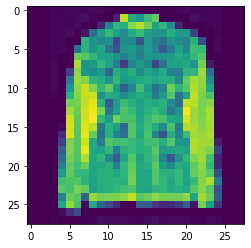

In [56]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math;
from matplotlib.pyplot import imshow

i = 5 # set any valid index of an image
label = train_df.values[i][0] # retrieve label from first colum in dataframe
print(label)
im_buf = train_df.values[i][1:] # create flat array of only the pixels of the given image
print(len(im_buf)); 
axis_len = int(math.sqrt(im_buf.shape[0])) # calculate the dimensions of the square image
print(axis_len);
im_array = np.int8(np.reshape(im_buf, (axis_len, axis_len))) # create a 2D array from flat array
img = Image.fromarray(im_array, 'L') # convert to a PIL.Image object ('L' is for grayscale)

print(f'Label: {label}')
imshow(np.asarray(img))

In [57]:
train_df['pixel12'] = train_df['pixel12'] / 255;
for i in train_df['pixel12']:
  print(i);

Streaming output truncated to the last 5000 lines.
0.8
0.19215686274509805
0.0
0.2196078431372549
0.0
0.48627450980392156
0.0
0.00392156862745098
0.0
0.0
0.0
0.0
0.0
0.011764705882352941
0.23921568627450981
0.8901960784313725
0.0
0.01568627450980392
0.1607843137254902
0.0
0.0
0.403921568627451
0.5137254901960784
0.34901960784313724
0.0
0.0
0.0
0.0
0.0
0.8117647058823529
0.0
0.0
0.0
0.8431372549019608
0.43529411764705883
0.5725490196078431
0.0
0.0
0.0
0.0
0.5490196078431373
0.15294117647058825
0.0
0.0
0.7725490196078432
0.00784313725490196
0.27450980392156865
0.058823529411764705
0.0
0.9058823529411765
0.0
0.0
0.6352941176470588
0.0
0.7490196078431373
0.5098039215686274
0.0
0.3058823529411765
0.0
0.09019607843137255
0.6627450980392157
0.0
0.41568627450980394
0.0
0.0
0.40784313725490196
0.0
0.0
0.0
0.0
0.9725490196078431
0.0
0.0
0.0
0.0
0.40784313725490196
0.5372549019607843
0.0
0.0
0.0
0.0
0.27058823529411763
0.39215686274509803
0.00392156862745098
0.0
0.40784313725490196
0.0
0.0
0.1960

In [58]:
test_label=test_df['label']

train_label=train_df['label']
data_names=[test_label,train_label]
all_labels=pd.concat(data_names,ignore_index=True)
print(all_labels);

0        0
1        1
2        2
3        2
4        3
        ..
69995    9
69996    1
69997    8
69998    8
69999    7
Name: label, Length: 70000, dtype: int64


In [59]:
data_name=[test_df,train_df]
all_image=pd.concat(data_name,ignore_index=True)
all_image=all_image.drop(labels='label',axis=1)
print(all_image.shape)
print(all_image);

(70000, 784)
       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...        31         0         0         0
3           0       0       0       0  ...       222        56         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
69995       0       0       0       0  ...         0         0         0         0
69996       0       0       0       0  ...         0         0         0         0
69997       0       0       0       0  ...         0         0         0         0
69998       0       0       0       0  ...         0         0         0         0
69999       0       0       0       0  ...         0         0         0  

0


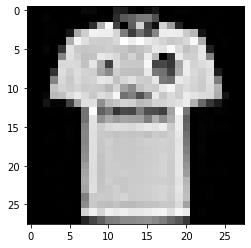

In [60]:
all_image=all_image/255.0
all_image=all_image.values.reshape(-1,28,28,1)

show_img = all_image[0].reshape(28, 28)
plt.imshow(show_img, cmap='gray')
print(all_labels[0])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_image, all_labels, test_size=0.2)

In [62]:
train_dataset_zipped = list(zip(X_train,y_train))
test_dataset_zipped = list(zip(X_test,y_test))
print(len(train_dataset_zipped))
print(len(test_dataset_zipped))

56000
14000


### For Experiment-1

In [63]:
batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200
output_dim   = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

7


In [67]:
num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:2800
Test dataloader:700


In [68]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        self.relu_5 = nn.ReLU()

        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        out  = self.linear_4(out)
        out = self.relu_4(out)

        out  = self.linear_5(out)
        out = self.relu_5(out)

        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [69]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [70]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [71]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images.float()) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:       
            correct = 0
            total = 0

            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images.float())

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)    
         
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
                
            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3083739280700684. Accuracy: 9.942857142857143
Iteration: 1000. Loss: 2.2969443798065186. Accuracy: 9.95
Iteration: 1500. Loss: 2.2982325553894043. Accuracy: 14.392857142857142
Iteration: 2000. Loss: 2.296783685684204. Accuracy: 16.45
Iteration: 2500. Loss: 2.2883007526397705. Accuracy: 24.857142857142858
Iteration: 3000. Loss: 2.262202739715576. Accuracy: 29.37857142857143
Iteration: 3500. Loss: 1.9232689142227173. Accuracy: 20.7
Iteration: 4000. Loss: 0.9957439303398132. Accuracy: 50.49285714285714
Iteration: 4500. Loss: 0.8661448359489441. Accuracy: 60.50714285714286
Iteration: 5000. Loss: 0.9381974935531616. Accuracy: 49.392857142857146
Iteration: 5500. Loss: 1.607581377029419. Accuracy: 61.55
Iteration: 6000. Loss: 0.706344723701477. Accuracy: 72.15714285714286
Iteration: 6500. Loss: 0.5926348567008972. Accuracy: 75.71428571428571
Iteration: 7000. Loss: 0.7665231823921204. Accuracy: 75.0
Iteration: 7500. Loss: 0.8484918475151062. Accuracy: 73.03571428571429


In [72]:
torch.save(model.state_dict(), '/content/drive/MyDrive/CSE4238/Assignment 2/Models/model_dataset2_ex1.pkl')

[2.3083739280700684, 2.2969443798065186, 2.2982325553894043, 2.296783685684204, 2.2883007526397705, 2.262202739715576, 1.9232689142227173, 0.9957439303398132, 0.8661448359489441, 0.9381974935531616, 1.607581377029419, 0.706344723701477, 0.5926348567008972, 0.7665231823921204, 0.8484918475151062, 0.5321853756904602, 0.754409670829773, 0.5263228416442871, 0.49729615449905396, 0.7776862978935242, 0.23093600571155548, 0.2697773575782776, 0.5165712833404541, 1.245163917541504, 0.4826733469963074, 0.3517294228076935, 0.3142217993736267, 0.21400268375873566, 0.2793172597885132, 0.43146830797195435, 0.817499041557312, 0.39507317543029785, 0.20011118054389954, 0.5415775179862976, 0.43156304955482483, 0.5191885232925415, 0.20924977958202362, 0.38765770196914673, 0.09801626950502396]


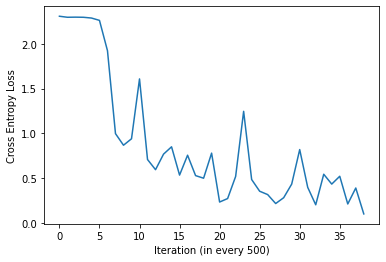

In [73]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### For Experiment 2

In [82]:
batch_size = 100
num_iters = 36500
input_dim = 28*28
num_hidden = 1000
output_dim = 10

learning_rate = 0.06


num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

65


In [83]:
num_epochs = num_iters / (len(train_dataset_zipped) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset_zipped, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset_zipped, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:560
Test dataloader:140


In [84]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()

        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        self.relu_5 = nn.ReLU()

        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)

        out  = self.linear_3(out)
        out = self.relu_3(out)

        out  = self.linear_4(out)
        out = self.relu_4(out)

        out  = self.linear_5(out)
        out = self.relu_5(out)

        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [85]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=1000, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=1000, out_features=1000, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=1000, out_features=10, bias=True)
)

In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [87]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images.float()) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:       
            correct = 0
            total = 0

            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images.float())

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)    
         
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
                
            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.1066489219665527. Accuracy: 54.49285714285714
Iteration: 1000. Loss: 0.7070781588554382. Accuracy: 70.67142857142858
Iteration: 1500. Loss: 0.7881578207015991. Accuracy: 72.14285714285714
Iteration: 2000. Loss: 0.48009979724884033. Accuracy: 82.81428571428572
Iteration: 2500. Loss: 0.43869373202323914. Accuracy: 84.5
Iteration: 3000. Loss: 0.38892731070518494. Accuracy: 84.6
Iteration: 3500. Loss: 0.3400315046310425. Accuracy: 87.21428571428571
Iteration: 4000. Loss: 0.30861717462539673. Accuracy: 87.17142857142858
Iteration: 4500. Loss: 0.28259655833244324. Accuracy: 87.73571428571428
Iteration: 5000. Loss: 0.26701414585113525. Accuracy: 86.43571428571428
Iteration: 5500. Loss: 0.25323572754859924. Accuracy: 87.37857142857143
Iteration: 6000. Loss: 0.27146512269973755. Accuracy: 87.95714285714286
Iteration: 6500. Loss: 0.2933778762817383. Accuracy: 87.05
Iteration: 7000. Loss: 0.2654724419116974. Accuracy: 88.68571428571428
Iteration: 7500. Loss: 0.165296077728

In [88]:
torch.save(model.state_dict(), '/content/drive/MyDrive/CSE4238/Assignment 2/Models/model_dataset2_exp2.pkl')

[1.1066489219665527, 0.7070781588554382, 0.7881578207015991, 0.48009979724884033, 0.43869373202323914, 0.38892731070518494, 0.3400315046310425, 0.30861717462539673, 0.28259655833244324, 0.26701414585113525, 0.25323572754859924, 0.27146512269973755, 0.2933778762817383, 0.2654724419116974, 0.16529607772827148, 0.329792857170105, 0.2957955002784729, 0.21174639463424683, 0.2130846232175827, 0.18162885308265686, 0.2436331957578659, 0.10700968652963638, 0.21614190936088562, 0.26386818289756775, 0.12643949687480927, 0.1762615442276001, 0.22773706912994385, 0.10768000781536102, 0.1731758564710617, 0.1575775295495987, 0.10917219519615173, 0.14440760016441345, 0.10475815832614899, 0.20568136870861053, 0.23064365983009338, 0.19815117120742798, 0.1790512502193451, 0.10945756733417511, 0.07694396376609802, 0.1621667891740799, 0.12052695453166962, 0.08385530114173889, 0.07612496614456177, 0.08337919414043427, 0.194796621799469, 0.06342725455760956, 0.13884180784225464, 0.12734319269657135, 0.0828008

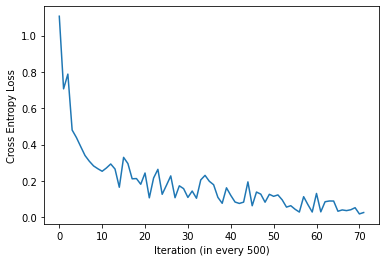

In [89]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()